In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bud_vs_rev.csv",parse_dates=["release_date"],index_col="release_date")

In [3]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.100000,11.000000
1915-12-13,The Cheat,0.017311,0.137365
1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.000000
1918-08-01,Mickey,0.250000,8.000000
1921-01-21,The Kid,0.250000,2.500000
...,...,...,...
2017-07-26,Atomic Blonde,30.000000,90.007945
2017-07-28,The Emoji Movie,50.000000,66.913939
2017-08-03,The Dark Tower,60.000000,71.000000


In [4]:
df.describe()

,budget,revenue
count,5381.000000,5381.000000
mean,31.094796,90.318123
std,40.162625,166.142264
min,0.000001,0.000001
25%,5.037000,7.011317
50%,17.000000,29.918745
75%,40.000000,99.965753
max,380.000000,2787.965087


In [5]:
df.mean()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25204\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


budget     31.094796
revenue    90.318123
dtype: float64

In [6]:
df.var()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25204\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


budget      1613.036484
revenue    27603.251777
dtype: float64

In [7]:
df.cov()

,budget,revenue
budget,1613.036484,4872.885024
revenue,4872.885024,27603.251777


In [8]:
df.budget.cov(df.revenue)

4872.885023793875

In [9]:
df.corr()

,budget,revenue
budget,1.000000,0.730271
revenue,0.730271,1.000000


In [11]:
df.budget.corr(df.revenue)

0.7302708168889314

In [ ]:
# revenue=a+b*budget

In [12]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.100000,11.000000
1915-12-13,The Cheat,0.017311,0.137365
1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.000000
1918-08-01,Mickey,0.250000,8.000000
1921-01-21,The Kid,0.250000,2.500000
...,...,...,...
2017-07-26,Atomic Blonde,30.000000,90.007945
2017-07-28,The Emoji Movie,50.000000,66.913939
2017-08-03,The Dark Tower,60.000000,71.000000


In [18]:
X = df[['budget']]

In [19]:
X

,budget
release_date,
1915-02-08,0.100000
1915-12-13,0.017311
1916-12-24,0.200000
1918-08-01,0.250000
1921-01-21,0.250000
...,...
2017-07-26,30.000000
2017-07-28,50.000000
2017-08-03,60.000000


In [20]:
y=df['revenue']

In [21]:
y

release_date
1915-02-08     11.000000
1915-12-13      0.137365
1916-12-24      8.000000
1918-08-01      8.000000
1921-01-21      2.500000
                 ...    
2017-07-26     90.007945
2017-07-28     66.913939
2017-08-03     71.000000
2017-08-03    184.770205
2017-08-04     24.527158
Name: revenue, Length: 5381, dtype: float64

In [ ]:
# train(70) test(30)

In [22]:
X_train=X[:-30]
X_test=X[-30:]

In [24]:
X_train.shape

(5351, 1)

In [25]:
X_test.shape

(30, 1)

In [26]:
y_train=y[:-30]
y_test=y[-30:]

In [27]:
y_train.shape

(5351,)

In [28]:
regr = linear_model.LinearRegression()

In [29]:
regr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = regr.predict(X_test)

In [31]:
regr.coef_

array([3.03369197])

In [32]:
mean_squared_error(y_test,y_pred)

46101.65554044016

In [33]:
r2_score(y_test,y_pred)

0.35958829058768105

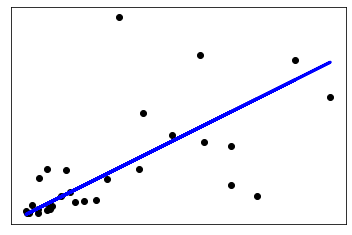

In [34]:
plt.scatter(X_test,y_test, color="black")
plt.plot(X_test,y_pred,color="blue",linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()